# Relatório Final Samuel Porto

Para os códigos de desenvolvidos nos projetos 1, 2 e 3; serão analisados seus comportamentos perante diferentes entradas de subsequências de DNA.

A pasta *Inputs* contém 100 entradas que possuem tamanho crescente e ao submetê-lás a cada um dos scripts será possível observar o comportamento do tempo de execução *vs* tamanho da entrada, nos levando a possíveis pontos de melhoras no código, quando adicionarmos à análise o profiling dos scripts.

### Análise Heurística

In [32]:
import time
import subprocess

time_list = []
size_list = []

for i in range(3201):
    with open(f'Inputs/dna_seq_{i}.txt') as f:
        size_list.append(int(f.readlines()[0]))
        
        start = time.perf_counter()
        
        proc = subprocess.run(['../Projeto1/heuristica'], input=f.read(), text=True, capture_output=True)
        
        end = time.perf_counter()
        
        time_list.append(end - start)
        

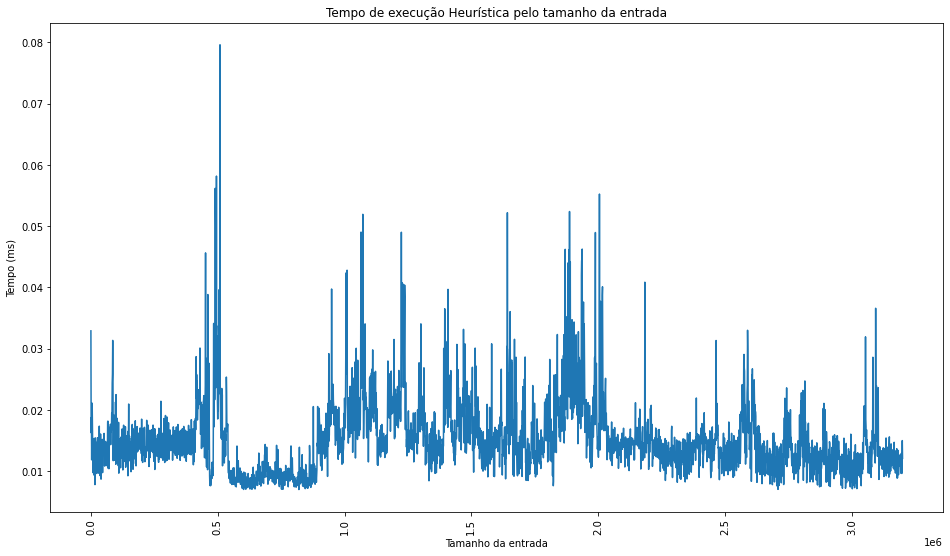

In [33]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize = (16, 9))

plt.plot(size_list, time_list)
plt.xlabel('Tamanho da entrada')
plt.ylabel('Tempo (ms)')
plt.xticks(rotation=90)
plt.title('Tempo de execução Heurística pelo tamanho da entrada')
plt.show()

O gráfico mostra que há bastante ruído e não há uma relação explícita de crescimento do tempo de execução com o aumento da sequencia de entrada, muito provavelmente pois o real tempo de execução esteja sendo afetado pelo fato de estarmos calculando como tempo total o delta tempo da chamada do método *run* de *subprocess*. O tempo seria melhor calculado se fizéssemos esse calculo de tempo dentro do próprio processo *../Projeto1/heurística* e se eliminássemos também os prints que estão presentes no código original.

Como observado no arquivo *"Projeto1/saida_profiling.txt"* que foi gerado ao rodar o *callgrind_annotate* vemos que há um total de: *5,326  events annotated* e desses 5326 é possível constatar que grande parte desses eventos estão correlacionados com a criação da matriz e também com o calculo iterativo da diagonal, inserção e deleção.

Com o intuito de diminuir o tempo de execução, seria necessário pensar numa maneira de reimplementar esses calculos de forma mais eficiente e também de armazenar as informações, não numa matriz, mas numa forma que seja otimizada.

### Análise Busca Local

In [35]:
time_list = []
size_list = []

for i in range(3201):
    with open(f'Inputs/dna_seq_{i}.txt') as f:
        size_list.append(int(f.readlines()[0]))
        
        start = time.perf_counter()
        
        proc = subprocess.run(['../Projeto2/busca_local'], input=f.read(), text=True, capture_output=True)
        
        end = time.perf_counter()
        
        time_list.append(end - start)
        

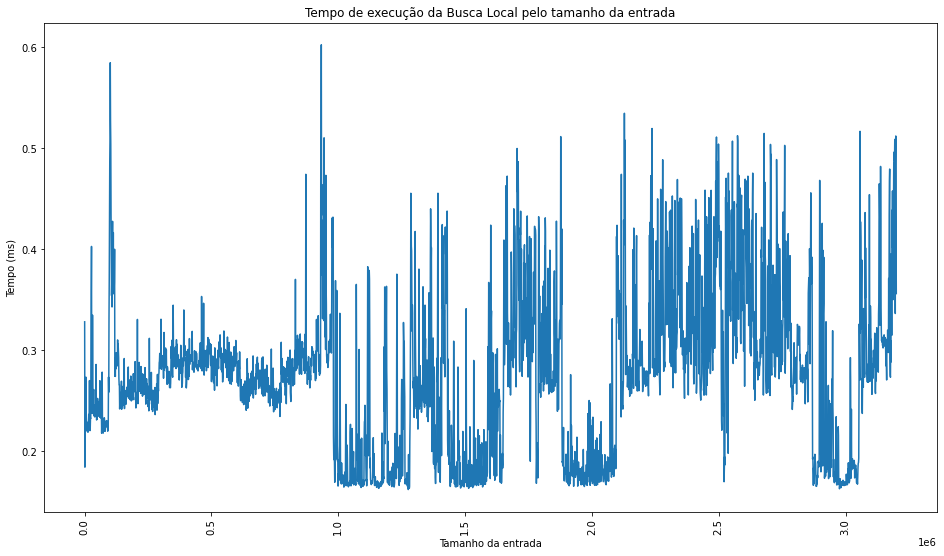

In [36]:
plt.figure(figsize = (16, 9))

plt.plot(size_list, time_list)
plt.xlabel('Tamanho da entrada')
plt.ylabel('Tempo (ms)')
plt.xticks(rotation=90)
plt.title('Tempo de execução da Busca Local pelo tamanho da entrada')
plt.show()

Assim como no gráfico mostrada anteriormente para a heurística há bastante ruído, muito provavelmente pois o real tempo de execução esteja sendo afetado pelo fato de estarmos calculando como tempo total o delta tempo da chamada do método *run* de *subprocess* e isso desloca a escala de tempo. Contudo, é possível constatar que há uma relação crescente de tempo de execução pelo tamanho da entrada. E o tempo seria melhor calculado se fizéssemos esse calculo de tempo dentro do próprio processo *../Projeto1/heurística* e se eliminássemos também os prints que estão presentes no código original.

Como observado no arquivo *"Projeto2/saida_profiling.txt"* que foi gerado ao rodar o *callgrind_annotate* vemos que há um total de: *621  events annotated* (desconsiderando os cin e os cout) e desses 621 é possível constatar que grande parte desses eventos estão correlacionados com os for que rodamos para percorrer as sequencias.

Com o intuito de diminuir o tempo de execução, seria necessário pensar numa maneira de reutilizar o mesmo for para evitar repetições e conseguir aproveitá-los para varrer as duas sequencias juntas.

### Análise Busca Exaustiva

In [38]:
time_list = []
size_list = []

for i in range(3201):
    with open(f'Inputs/dna_seq_{i}.txt') as f:
        size_list.append(int(f.readlines()[0]))
        
        start = time.perf_counter()
        
        proc = subprocess.run(['../Projeto3/busca_exaustiva'], input=f.read(), text=True, capture_output=True)
        
        end = time.perf_counter()

        time_list.append(end - start)
        

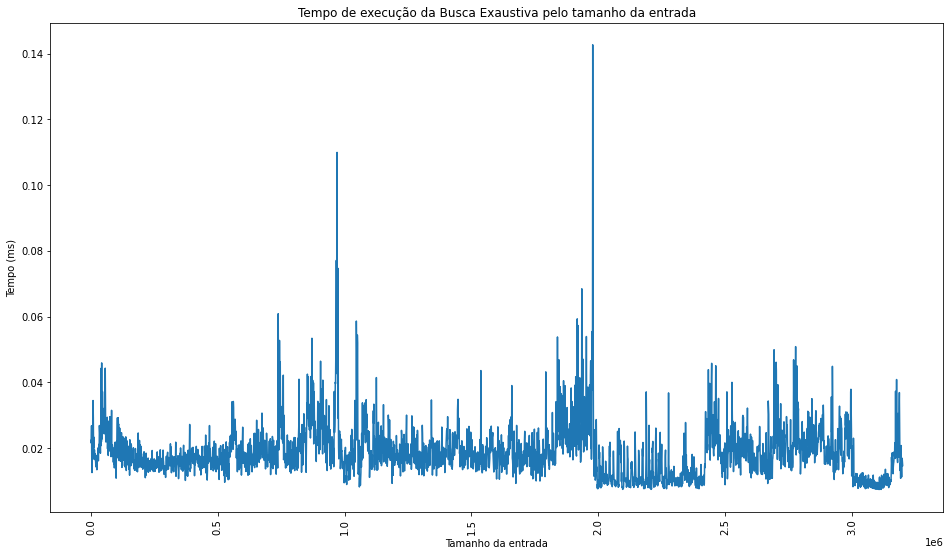

In [39]:
plt.figure(figsize = (16, 9))

plt.plot(size_list, time_list)
plt.xlabel('Tamanho da entrada')
plt.ylabel('Tempo (ms)')
plt.xticks(rotation=90)
plt.title('Tempo de execução da Busca Exaustiva pelo tamanho da entrada')
plt.show()

O gráfico mostra que há bastante ruído e não há uma relação explícita de crescimento do tempo de execução com o aumento da sequencia de entrada, muito provavelmente pois o real tempo de execução esteja sendo afetado pelo fato de estarmos calculando como tempo total o delta tempo da chamada do método *run* de *subprocess*. O tempo seria melhor calculado se fizéssemos esse calculo de tempo dentro do próprio processo *../Projeto3/busca_exaustiva* e se eliminássemos também os prints que estão presentes no código original.

Como observado no arquivo *"Projeto3/saida_profiling.txt"* que foi gerado ao rodar o *callgrind_annotate* vemos que há um total de: *1,591,034  events annotated* (desconsiderando os cin e os cout) e desses 1,591,034 é possível constatar que grande parte desses eventos estão correlacionados com os for que rodamos para percorrer as sub-sequencias e com as chamadas das funções que calculam o score. É fácil perceber que como a busca exaustiva, como o próprio nome já diz, possui uma quantidade maior de eventos.

Com o intuito de diminuir o tempo de execução, seria necessário pensar numa maneira de reutilizar o mesmo for para evitar repetições e conseguir aproveitá-los para varrer as duas sequencias juntas.